# Import required packages for model

In [1]:
## os to get audio file paths
import os
## re to replace filenames
import re
## data cleaning, normalize strange chars
#import unicode

#work with folder/file paths
import pathlib
import random
#python math
import numpy as np
import librosa
import librosa.display
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Create variables for data paths, test and train

In [2]:
DATASET_PATH = r"C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data"
train_dir = pathlib.Path(f'{DATASET_PATH}/Training')
test_dir = pathlib.Path(f'{DATASET_PATH}/Test')

if not train_dir.exists():
    print("Training path does not exist. Please check dataset location.")

if not test_dir.exists():
    print("Test path does not exist. Please check dataset location.")

print(train_dir)
print(test_dir)

C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test


# Preliminary dataset - unsanitized

In [3]:
test_folder_names = np.array(tf.io.gfile.listdir(str(test_dir))) # ['Am' 'Bb' 'Bdim' 'C' 'Dm' 'Em' 'F' 'G']
train_folder_names = np.array(tf.io.gfile.listdir(str(train_dir))) # ['Am' 'Bb' 'Bdim' 'C' 'Dm' 'Em' 'F' 'G']

def list_audios_with_path(base_path, folder_names):

    # An array of paths the each folder in Training
    folder_paths = [os.path.join(base_path, folderName) for folderName in folder_names if os.path.isdir(os.path.join(base_path, folderName))]

    
    # loop through every path, get every .wav in each foler add to array file_names[]
    result = {}
    for path in folder_paths:
        file_names = []
        for root, dirs, files in os.walk(path):
            for name in files:
                file_names.append(name)
            #path will be the key in each result dictionary
            result[path] = file_names
    return result

train_result = list_audios_with_path(train_dir, train_folder_names)
for path, files in train_result.items():
    print(f"\n {path}")
    print(files)
        

test_result = list_audios_with_path(test_dir, test_folder_names)
for path, files in test_result.items():
    print(f"\n {path}")
    print(files)
    



 C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am
['Am_001.wav', 'Am_002.wav', 'Am_003.wav', 'Am_004.wav', 'Am_005.wav', 'Am_006.wav', 'Am_007.wav', 'Am_008.wav', 'Am_009.wav', 'Am_010.wav', 'Am_011.wav', 'Am_012.wav', 'Am_013.wav', 'Am_014.wav', 'Am_015.wav', 'Am_016.wav', 'Am_017.wav', 'Am_018.wav', 'Am_019.wav', 'Am_020.wav', 'Am_021.wav', 'Am_022.wav', 'Am_023.wav', 'Am_024.wav', 'Am_025.wav', 'Am_026.wav', 'Am_027.wav', 'Am_028.wav', 'Am_029.wav', 'Am_030.wav', 'Am_031.wav', 'Am_032.wav', 'Am_033.wav', 'Am_034.wav', 'Am_035.wav', 'Am_036.wav', 'Am_037.wav', 'Am_038.wav', 'Am_039.wav', 'Am_040.wav', 'Am_041.wav', 'Am_042.wav', 'Am_043.wav', 'Am_044.wav', 'Am_045.wav', 'Am_046.wav', 'Am_047.wav', 'Am_048.wav', 'Am_049.wav', 'Am_050.wav', 'Am_051.wav', 'Am_052.wav', 'Am_053.wav', 'Am_054.wav', 'Am_055.wav', 'Am_056.wav', 'Am_057.wav', 'Am_058.wav', 'Am_059.wav', 'Am_060.wav', 'Am_061.wav', 'Am_062.wav', 'Am_063.wav', 'Am_064.wav', 'Am_065.wav', 'Am_066.wav', 'Am

# Processing data for Model: Filenames

In [4]:
# takes a  single file, cleans every .wav file inside
def clean_filename(filename):
    name, ext = os.path.splitext(filename)
    clean_name = re.sub(r'[^\w\d-]+','-', name)
    label_name = clean_name.split('_')[0]
    return label_name

# Loops ever folder, sends each file in folder to be cleaned
def clean_folder(folder_path):
    for fname in os.listdir(folder_path):
        old_path = os.path.join(folder_path, fname)
        if os.path.isfile(old_path):
            new_fname = clean_filename(fname)
            new_path = os.path.join(folder_path, new_fname)


######### Clean Training data


#Loop all paths, clean file names in the paths
for path, files in train_result.items():
    clean_folder(path)
    
######### Clean Testing data

#Loop all paths, clean file names in the paths
for path, files in test_result.items():
    clean_folder(path)

train_result = list_audios_with_path(train_dir, train_folder_names)
for path, files in train_result.items():
    print(f"\nCleaned: {path}")
    print(files)
        

test_result = list_audios_with_path(test_dir, test_folder_names)
for path, files in test_result.items():
    print(f"\nCleaned: {path}")
    print(files)


Cleaned: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am
['Am_001.wav', 'Am_002.wav', 'Am_003.wav', 'Am_004.wav', 'Am_005.wav', 'Am_006.wav', 'Am_007.wav', 'Am_008.wav', 'Am_009.wav', 'Am_010.wav', 'Am_011.wav', 'Am_012.wav', 'Am_013.wav', 'Am_014.wav', 'Am_015.wav', 'Am_016.wav', 'Am_017.wav', 'Am_018.wav', 'Am_019.wav', 'Am_020.wav', 'Am_021.wav', 'Am_022.wav', 'Am_023.wav', 'Am_024.wav', 'Am_025.wav', 'Am_026.wav', 'Am_027.wav', 'Am_028.wav', 'Am_029.wav', 'Am_030.wav', 'Am_031.wav', 'Am_032.wav', 'Am_033.wav', 'Am_034.wav', 'Am_035.wav', 'Am_036.wav', 'Am_037.wav', 'Am_038.wav', 'Am_039.wav', 'Am_040.wav', 'Am_041.wav', 'Am_042.wav', 'Am_043.wav', 'Am_044.wav', 'Am_045.wav', 'Am_046.wav', 'Am_047.wav', 'Am_048.wav', 'Am_049.wav', 'Am_050.wav', 'Am_051.wav', 'Am_052.wav', 'Am_053.wav', 'Am_054.wav', 'Am_055.wav', 'Am_056.wav', 'Am_057.wav', 'Am_058.wav', 'Am_059.wav', 'Am_060.wav', 'Am_061.wav', 'Am_062.wav', 'Am_063.wav', 'Am_064.wav', 'Am_065.wav', 'Am_066.w

In [5]:
total_train_Count = 0
total_test_Count = 0

#Create array of chord paths in the training data folder.
training_folder_paths = [os.path.join(train_dir, folderName) for folderName in train_folder_names if os.path.isdir(os.path.join(train_dir, folderName))]

for path in training_folder_paths:
    count = 0
    for root, dirs, files in os.walk(path):
        for name in files:
            count += 1
    print(path, " total: ", count)
    total_train_Count += count
print( "\n", "Training files total: ", total_train_Count, "\n")

#Create array of chord paths in the testing data folder.
testing_folder_paths = [os.path.join(test_dir, folderName) for folderName in test_folder_names if os.path.isdir(os.path.join(test_dir, folderName))]

for path in testing_folder_paths:
    count = 0
    for root, dirs, files in os.walk(path):
        for name in files:
            count += 1
    print(path, " total: ", count)
    total_test_Count += count
print( "\n", "Testing files total: ", total_test_Count)

C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Bb  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Bdim  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\C  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Dm  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Em  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\F  total:  180
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\G  total:  180

 Training files total:  1440 

C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Am  total:  40
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Bb  total:  40
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Bdim  total:  40
C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\C  tot

In [6]:
# folder names for each dataset of chords
# test_folder_names
# train_folder_names

label_to_index = {str(label): i for i, label in enumerate(train_folder_names)}
index_to_label = {i: str(label) for label, i in label_to_index.items()}

print("Full paths for training file: " + "\n")
training_samples = []
for root, dirs, files in os.walk(train_dir):
    for name in files:
        full_path = os.path.join(root, name)
        training_samples.append(full_path)
print(training_samples[0], "\n")


print("full paths for testing file: " + "\n")
testing_samples = []
for root, dirs, files in os.walk(test_dir):
    for name in files:
        full_path = os.path.join(root, name)
        testing_samples.append(full_path)
print(testing_samples[5])

# paths: 
# training_samples
# testing_samples

Full paths for training file: 

C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_001.wav 

full paths for testing file: 

C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Am\Am_006.wav


# Create uniform audio files 64kHz (2 seconds)

In [7]:
# Array of chord paths in the training data folder: training_folder_paths
# Array of chord paths in the testing data folder: testing_folder_paths


#Set length of all audios, to 64000 (2 seconds) so the diagrams are uniform by take a folder path
def load_and_set_wav_files(folder_path, target_sr=22050, target_len=64000):
    audios = []
    labels = []
    file_names = []
    paths = []
    original_len = []

    label = str(os.path.basename(folder_path))
    label_index = label_to_index.get(label)
    
    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            file_path = os.path.join(folder_path, file)
            y, sr = librosa.load(file_path, sr=target_sr, mono=True)
            original_len.append(y.shape)
            # trim audio with no noise, and set length to target_len
            y_trimmed, _ = librosa.effects.trim(y, top_db=20)
            y_fixed = librosa.util.fix_length(y_trimmed, size=target_len)
            audios.append(y_fixed)
            labels.append(label_index)
            paths.append(file_path)
            file_names.append(file)

    if audios:
        print(f"Label: {labels[0]}, Original Shape: {original_len[0]} Fixed Shape: {audios[0].shape}, Total fixed: {len(audios)}")
            
    #Each .wav now label by number below
    return audios, labels, sr, file_names, paths

print("shaping all audios to length 88000")


audios = []
labels = []
file_names = []
paths = []

# For every  training folder path, load_and_set_wav_files()
for path in training_folder_paths:
    audios_batch, labels_batch, sr, file_names_batch, paths_batch = load_and_set_wav_files(path)
    audios.extend(audios_batch)
    labels.extend(labels_batch)
    file_names.extend(file_names_batch)
    paths.extend(paths_batch)

waveform_ds = [audios, labels, file_names, paths]

print(f"first audio sample filename: {paths[0]}")
print(f"Label index: {labels[0]}")
print(f"File name: {file_names[0]}")

test_audios = []
test_labels = []
test_file_names = []
test_paths = []

# For every test folder path, load_and_set_wav_files()
for path in testing_folder_paths:
    audios_batch, labels_batch, sr, file_names_batch, paths_batch = load_and_set_wav_files(path)
    test_audios.extend(audios_batch)
    test_labels.extend(labels_batch)
    test_file_names.extend(file_names_batch)
    test_paths.extend(paths_batch)

test_waveform_ds = [test_audios, test_labels, test_file_names, test_paths]

print(f"Test first audio sample filename: {test_paths[0]}")
print(f"Test label index: {test_labels[0]}")
print(f"Test file name: {test_file_names[0]}")

shaping all audios to length 88000
Label: 0, Original Shape: (49674,) Fixed Shape: (64000,), Total fixed: 180
Label: 1, Original Shape: (61134,) Fixed Shape: (64000,), Total fixed: 180
Label: 2, Original Shape: (59595,) Fixed Shape: (64000,), Total fixed: 180
Label: 3, Original Shape: (45774,) Fixed Shape: (64000,), Total fixed: 180
Label: 4, Original Shape: (38037,) Fixed Shape: (64000,), Total fixed: 180
Label: 5, Original Shape: (69898,) Fixed Shape: (64000,), Total fixed: 180
Label: 6, Original Shape: (47616,) Fixed Shape: (64000,), Total fixed: 180
Label: 7, Original Shape: (44099,) Fixed Shape: (64000,), Total fixed: 180
first audio sample filename: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_001.wav
Label index: 0
File name: Am_001.wav
Label: 0, Original Shape: (101494,) Fixed Shape: (64000,), Total fixed: 40
Label: 1, Original Shape: (140544,) Fixed Shape: (64000,), Total fixed: 40
Label: 2, Original Shape: (136705,) Fixed Shape: (64000,), Total fix

# Visualize waveforms

In [8]:
test_count = 0
count = 0

audio_samples = random.sample(range(len(audios)), 5)

for i in audio_samples:
    count +=1
    print(f"Path: {paths[i]}, Label: {labels[i]}, File: {file_names[i]}, Shape: {tf.shape(audios[i])}")

print("\n")
Test_audio_samples = random.sample(range(len(test_audios)), 5)

for k in Test_audio_samples:
    test_count += 1
    print(f"Path: {test_paths[k]}, Label: {test_labels[k]}, File: {test_file_names[k]}, Shape: {tf.shape(test_audios[k])}")
print("Test Total: ", len(audios))
print("Train total: ", len(test_audios))

Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Bb\Bb_040.wav, Label: 1, File: Bb_040.wav, Shape: [64000]
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Bb\Bb_131.wav, Label: 1, File: Bb_131.wav, Shape: [64000]
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Bb\Bb_064.wav, Label: 1, File: Bb_064.wav, Shape: [64000]
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\Am\Am_052.wav, Label: 0, File: Am_052.wav, Shape: [64000]
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Training\C\C_078.wav, Label: 3, File: C_078.wav, Shape: [64000]


Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\G\G_024.wav, Label: 7, File: G_024.wav, Shape: [64000]
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Bb\Bb_013.wav, Label: 1, File: Bb_013.wav, Shape: [64000]
Path: C:\Users\shane\Documents\GitHub\Chord_App\audio_data\data\Test\Bb\Bb_006.wav, Label: 1, F

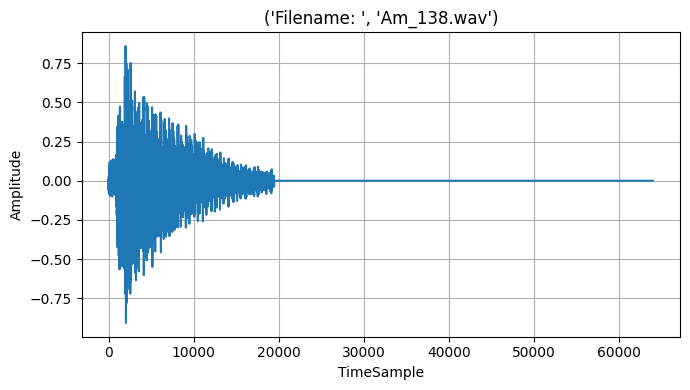

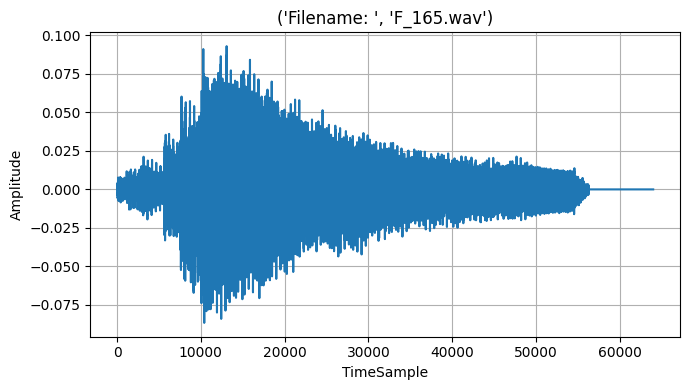

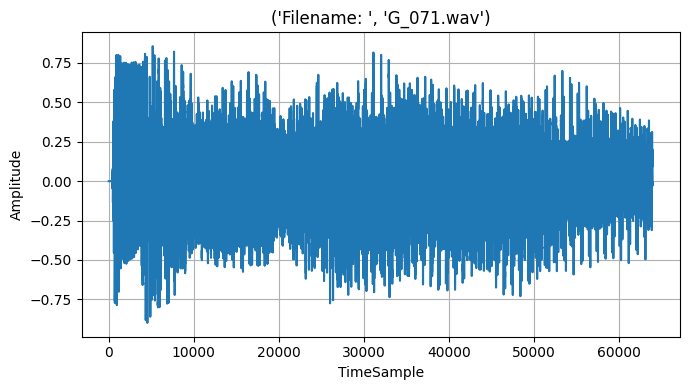

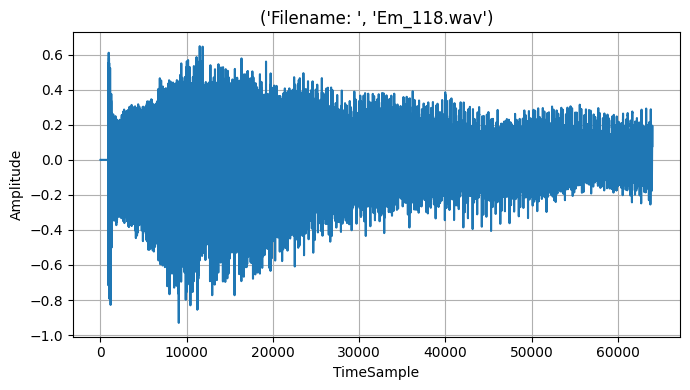

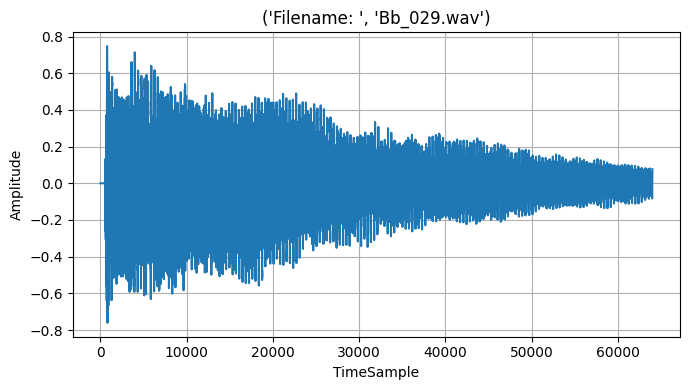

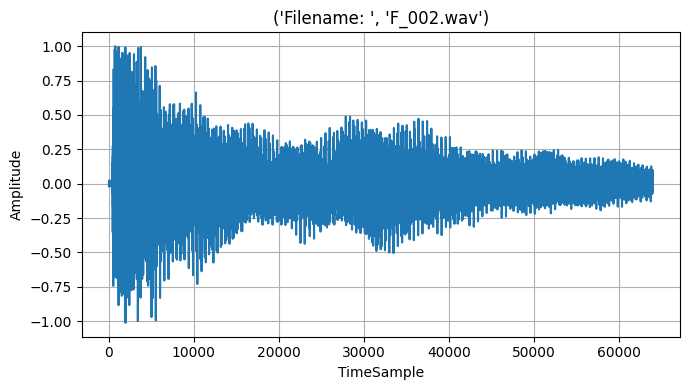

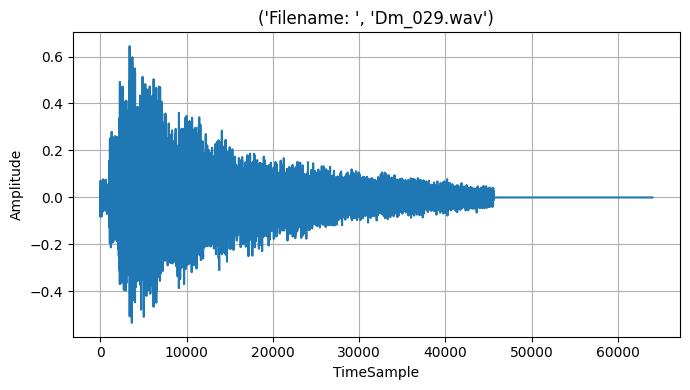

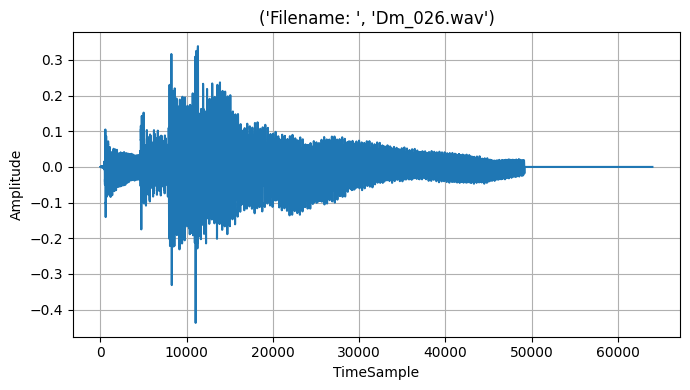

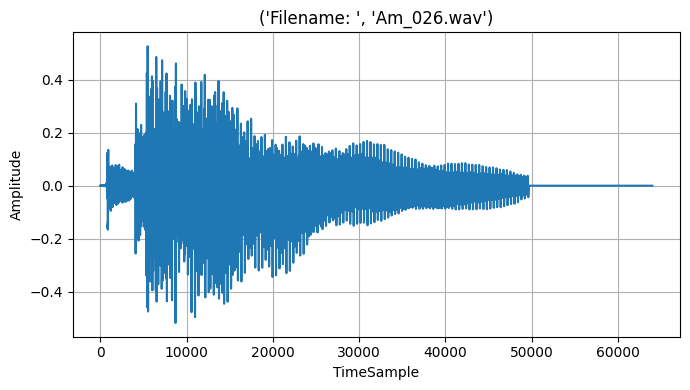

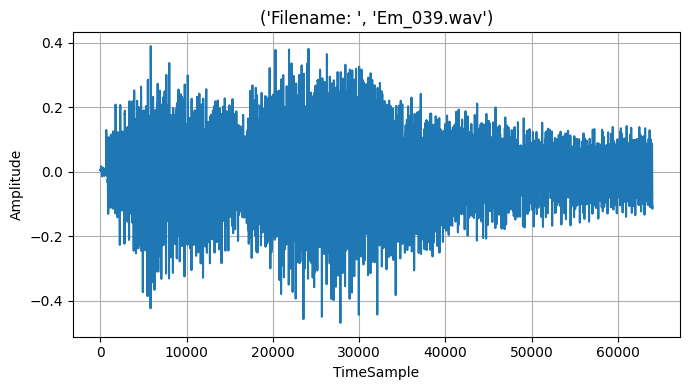

In [9]:
import random

training_samples = random.sample(range(len(audios)), 5)

for i in training_samples:
    plot_title = f"Filename: ", file_names[i]
    plt.figure(figsize=(7, 4))
    plt.plot(audios[i])
    plt.title(plot_title)
    plt.xlabel("TimeSample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

test_samples = random.sample(range(len(test_audios)), 5)
for i in test_samples:
    plot_title = f"Filename: ", test_file_names[i]
    plt.figure(figsize=(7, 4))
    plt.plot(test_audios[i])
    plt.title(plot_title)
    plt.xlabel("TimeSample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    

In [10]:
print("audio 1: ", audios[0])
print("audio 1 shape: ", tf.shape(audios[0]))

audio 1:  [5.6111501e-05 3.1715175e-05 7.7025747e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
audio 1 shape:  tf.Tensor([64000], shape=(1,), dtype=int32)


In [11]:
print(label_to_index)

{'Am': 0, 'Bb': 1, 'Bdim': 2, 'C': 3, 'Dm': 4, 'Em': 5, 'F': 6, 'G': 7}


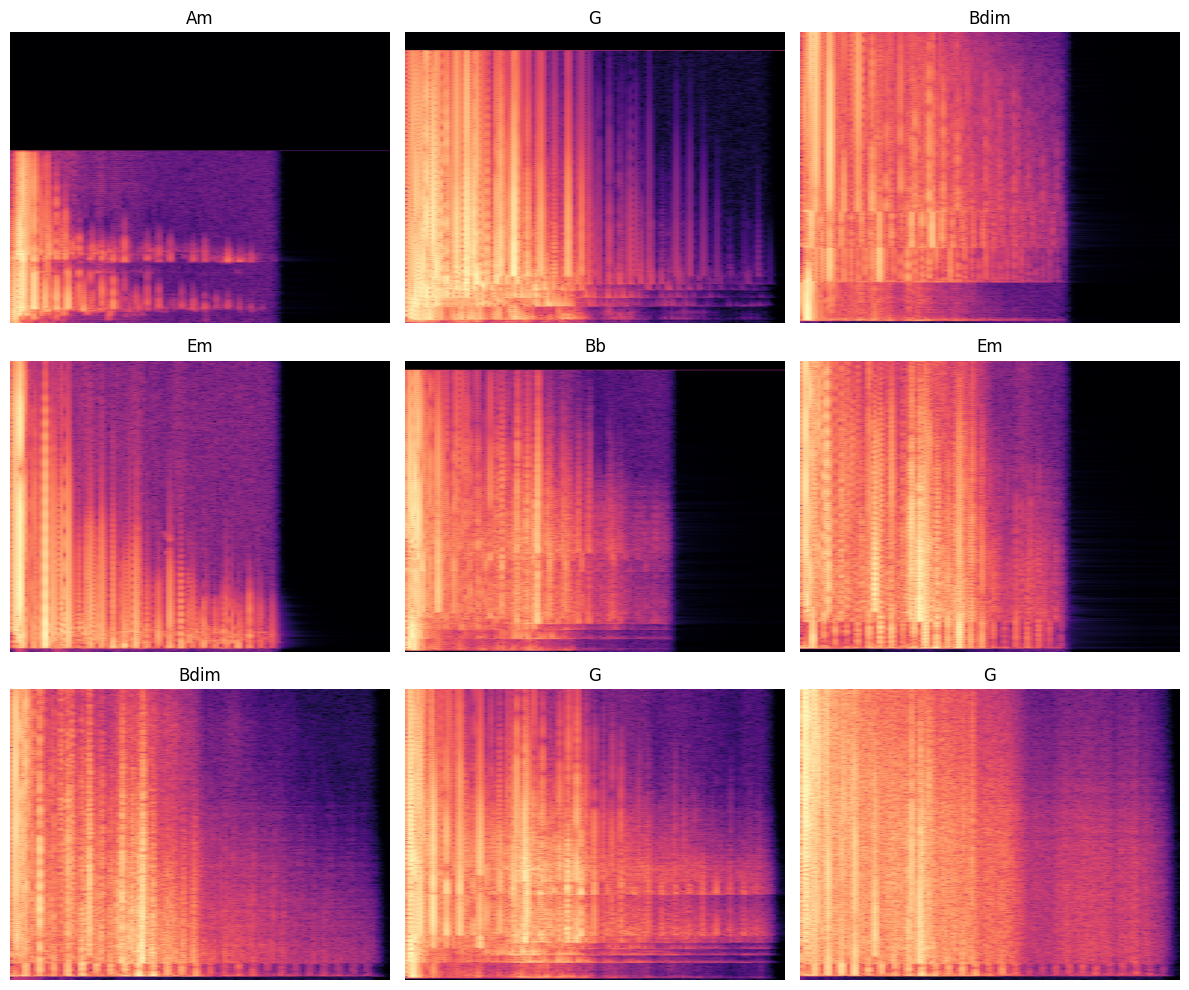

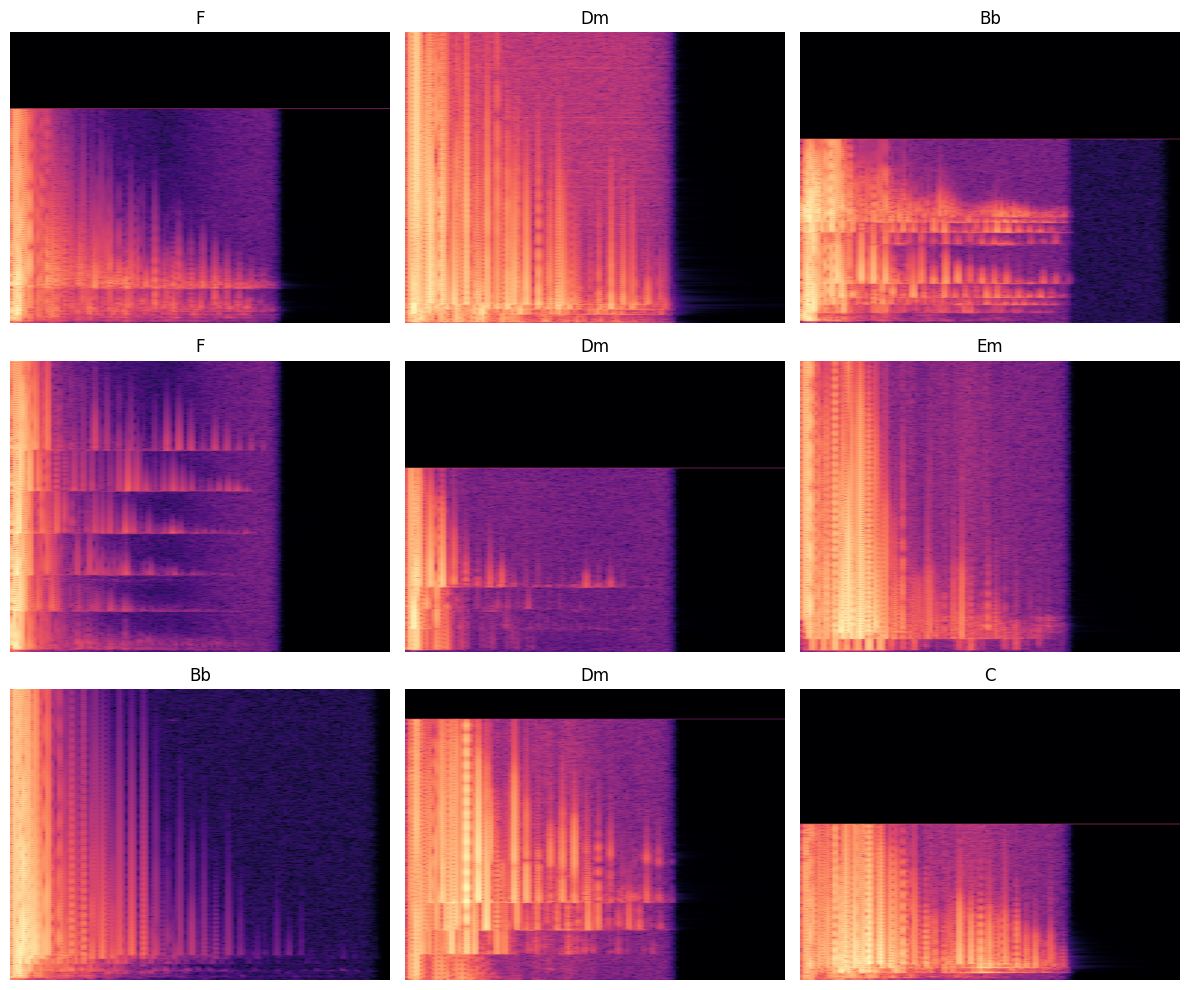

In [58]:

def convert_to_spectrogram(waveform):
    waveform = tf.cast(waveform, dtype=tf.float32)
    waveform = tf.reshape(waveform, [-1])
    # Each frame takes 256 (8ms of data)
    # 128 (4ms) hop between frames captured
    spectrogram = tf.signal.stft(
        waveform,
        #Window size of capture data
        frame_length=256,
        # size of step between captures
        frame_step=128,
        fft_length=256
    )
    spectrogram = tf.abs(spectrogram) ** 2
    spectrogram_db = 10 * tf.math.log(spectrogram + 1e-10) / tf.math.log(10.0)
    spectrogram_db = tf.transpose(spectrogram_db)
    return spectrogram_db

def plot_spectrograms(spectrogram_ds):
    rows = 3
    cols = 3
    n = rows * cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
    for i, (spectrogram, label_index) in enumerate(spectrogram_ds[:n]):
        r = i // cols
        c = i % cols
        ax = axes[r][c]
        ax.imshow(tf.transpose(spectrogram).numpy(), aspect='auto', origin='lower', cmap='magma')
        ax.set_title(index_to_label[label_index])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

############ TRAINING Collect all spectrograms and labels to be sent to plot_spectrogram()

audios, labels, file_names, paths = waveform_ds
spectrogram_ds = []
# arrays for training spectrograms
X = []
Y = []

for waveform, label_index in zip(audios, labels):
    spectrogram = convert_to_spectrogram(waveform)
    #prep spectrograms for training
    X.append(spectrogram)
    Y.append(label_index)
    spectrogram_ds.append((spectrogram, label_index))
    
X = tf.stack(X)
# Shape X for num_samples, freq_bins, time_frames, add another dimension
X = tf.expand_dims(X, -1)
Y = tf.convert_to_tensor(Y)

# plot a grid of spectrograms
random_specs = random.sample(range(len(spectrogram_ds)), 9)

sample_specs = [spectrogram_ds[i] for i in random_specs]
plot_spectrograms(sample_specs)

#@@@@@@@@@@@ TESTING Collect all spectrograms and labels to be sent to plot_spectrogram()
#waveform_ds = []

test_audios, test_labels, test_file_names, test_paths = test_waveform_ds
test_spectrogram_ds = []
# arrays for training

test_X = []
test_Y = []

for waveform, label_index in zip(test_audios, test_labels):
    test_spectrogram = convert_to_spectrogram(waveform)
    #prep spectrograms for training
    test_X.append(test_spectrogram)
    test_Y.append(label_index)
    test_spectrogram_ds.append((test_spectrogram, label_index))

test_X = tf.stack(test_X)
# Shape X for num_samples, freq_bins, time_frames, add another dimension
test_X = tf.expand_dims(test_X, -1)
test_Y = tf.convert_to_tensor(test_Y)

# Display a grid of spectrograms
test_random_specs = random.sample(range(len(test_spectrogram_ds)), 9)
test_sample_specs = [test_spectrogram_ds[i] for i in test_random_specs]

plot_spectrograms(test_sample_specs)

# Convolution Neural Network Model training

In [59]:
print("Testing dataset and label dimensions: ")
print("Test Spec dataset shape: ", np.array(test_X).shape)
print("test Labels shape: ", np.array(test_Y).shape)

print("\nTraining dataset and label dimensions: ")
print("Spec dataset shape: ", np.array(X).shape)
print("Labels shape: ", np.array(Y).shape)


Testing dataset and label dimensions: 
Test Spec dataset shape:  (320, 129, 499, 1)
test Labels shape:  (320,)

Training dataset and label dimensions: 
Spec dataset shape:  (1440, 129, 499, 1)
Labels shape:  (1440,)


In [60]:
X_np = X.numpy()
Y_np = Y.numpy()

print(X_np.shape)
print(Y_np.shape)


(1440, 129, 499, 1)
(1440,)


In [62]:
## Create a validation set from Training to validate the model
## Dataset already has a training,test set.
# Tensorflow does not allow direct indexing of tensors, so convert to array:



X_train, X_test, y_train, y_test = train_test_split(
    X_np,Y_np, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)

(1152, 129, 499, 1)
(288, 129, 499, 1)


# Fit model

In [65]:
## IMPORTED AT TOP: from tensorflow.keras import layers, models

#Input shape to match spectrogram dimensions, 1 is greyscale
input_shape = (129, 499, 1)

# Fit the state of the layer to the spectrograms

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')
    ])

model.summary()
                  

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 127, 497, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 63, 248, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 61, 246, 32)         │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 30, 123, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 121, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 14, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 58, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 6, 29, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 22272)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       2,850,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,949,128 (11.25 MB)

 Trainable params: 2,949,128 (11.25 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

# Epochs are how many times to model passes the dataset
EPOCHS = 15
## DATA - training sets, test sets, size of test, callback in event of error
## EarlyStopping eith patience=3 if no improvement is seen in epochs
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    callbacks=EarlyStopping(verbose=1, patience=6),
)

Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 477ms/step - accuracy: 0.1457 - loss: 5.5328 - val_accuracy: 0.2674 - val_loss: 2.0515
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 448ms/step - accuracy: 0.2268 - loss: 1.9669 - val_accuracy: 0.5417 - val_loss: 1.2216
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 447ms/step - accuracy: 0.5003 - loss: 1.3431 - val_accuracy: 0.7014 - val_loss: 0.8911
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 450ms/step - accuracy: 0.6017 - loss: 1.1264 - val_accuracy: 0.7396 - val_loss: 0.6778
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 446ms/step - accuracy: 0.6884 - loss: 0.8042 - val_accuracy: 0.7396 - val_loss: 0.6827
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 451ms/step - accuracy: 0.7394 - loss: 0.7503 - val_accuracy: 0.7431 - val_loss: 0.6320
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 437ms/step - accuracy: 0.7392 - loss: 0.6834 - val_accuracy: 0.7708 - val_loss: 0.5883
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 431ms/step - accuracy: 0.7775 - loss: 0.6258 - val_accu

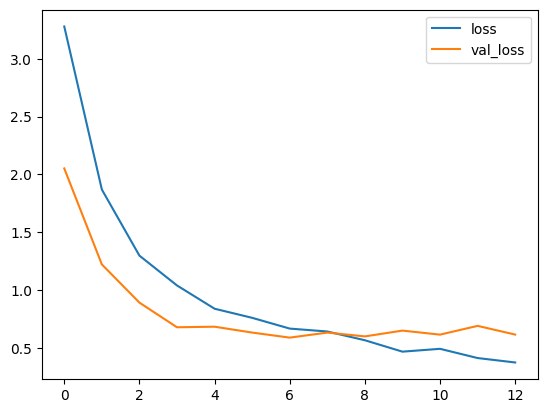

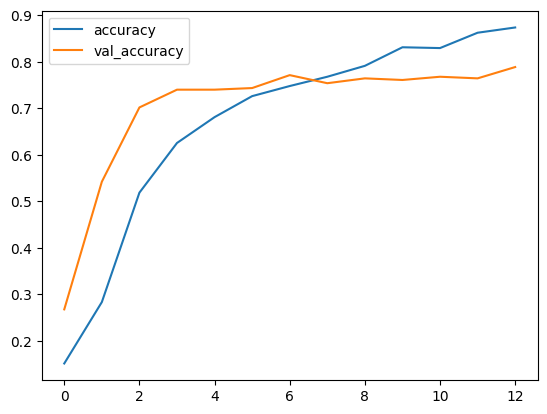

In [68]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

# Accuracy over each Epoch improves over time, then plataus. Early stopping

# Confusion Matrix

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step


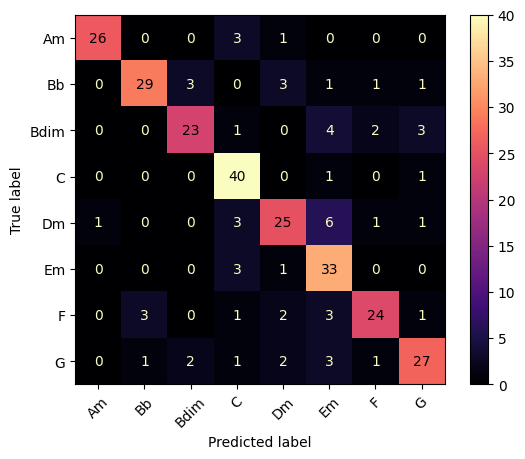

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = model.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()
y_true = y_test

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(label_to_index.keys()))
disp.plot(cmap='magma',
          xticks_rotation=45)
plt.title=("Confusion Matrix")
plt.show()

In [75]:

print("y_test shape: ", y_test.shape)
# shape of y_pred_probs is numbder of samples, and number of classes (8 labels)
print("y_pred_probs shape: ", y_pred_probs.shape)
# shows percentages of probability for each class of chord
print("y_pred_probs[0]: ",y_pred_probs[0])

y_test shape:  (288,)
y_pred_probs shape:  (288, 8)
y_pred_probs[0]:  [0.07178633 0.01299141 0.24088944 0.47025588 0.08400185 0.09677091
 0.00715022 0.01615395]


In [72]:
model.save('models/chord_model_64.h5')

In [73]:
print(os.getcwd())

C:\Users\shane\Documents\GitHub\Chord_App\notebooks
